# **Group 19 Project**  **GIVE BETTER TITLE**

# **Introduction**

Video games have evolved from simple pastimes into complex environments that offer rich data about user behavior and interaction. This report is grounded in a real-world data science project conducted by a research group in Computer Science at UBC, led by Frank Wood. The team has established a Minecraft server where every action taken by players is recorded. By capturing this data, the researchers aim to unlock insights into how individuals navigate and interact within virtual worlds.

The project has multiple objectives, and we will focus on understanding the characteristics and behaviors that most predict a player's likelihood to subscribe to a game-related newsletter. This targeted approach helps ensure that sufficient resources—such as software licenses and server hardware—are available to support the anticipated influx of players. By investigating player behavior through detailed analytics, the study aims to inform future strategies for engagement, recruitment, and resource allocation in online gaming communities. This report will detail the specific methodologies used to analyze the player data, the key findings related to newsletter subscription behavior, and the implications of these findings.

# **Question**

Are age and gender predictive of subscription status to a game related newsletter in the player.csv data set?

## Data Set Description

There a two datasets containing information on players on the MineCraft server; "players.csv" and "sessions.csv". 

The "players.csv" dataset contains observations collected for multiple different variables from people who played on the MineCraft server. The data frame contains 7 variables and 196 rows of data, producing 1372 observations in total. The variables are ordered in the table left to right are:

- `Experience`
    - This variable describes the level at which each player is at in terms of playing the game.
    - This variable is represented by a string value that can be either Amateur, Beginner, Regular, Pro, or Veteran
- `Subscribe`
    - This variable describes whether or not the player is subscribed to a game-related newsletter.
    - This variable is represented by a boolean value (either True or False) 
- `Hashed Email`
    - This variable describes lists each players email in a hashed format. 
    - This variable is represented by a string  
- `Hours Played`
    - This variable describeshow many hours each player spent playing the game (in hours). 
    - This variable is represented by a float value (number with a decimal value)
- `Name`
    - This variable states the players first name
    - This variable is represented by a string  
- `Gender`
    - This variable describes the gender of each player. 
    - This variable is represented by a string value that can be either Agender, Female, Male, Non-binary, other, Prefer not to say, or Two-Spirited
- `Age`
    - This variable describes the age of the players (in years) 
    - This variable represented by an integer value (whole number) 

**This is the data set that will be used in the analysis.**

The "sessions.csv" data contains observations collected for multiple different variables from people who played on the MineCraft server. The data frame contains 5 variables and 1535 rows of data, producing 7675 observations in total. The variables are ordered in the table from left to right are:

- `hashedEmail`
    - This variable gives a string of letters and numbers that represent the players email address. 
    - This variable is represented by a string  
- `start_time`
    - This variable gives the exact date (DD/MM/YR) and time (24 hour clock) that the player started their session.
    -  This variable is represented by a string
- `end_time`
    - This variable the exact date (DD/MM/YR) and time (24 hour clock) that the player ended their session. 
    - This variable is represented by a string  
- `original_start_time`
    - This variable describes the original start time of players  (**IDK HOW TO DESCRIBE IT BETTER**)
    - This variable is represented by a float value (number with a decimal value)
- `original_end_time`
    - This variable describes the original end time of players (**SAME HERE**)
    - This variable is represented by a float value (number with a decimal value)


This data set will not be used in the analysis. 

In [2]:
library(tidyverse)
library(rvest)
library(dplyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding




In [3]:
# url_sessions <- "https://raw.githubusercontent.com/IFQXK/DSCI-100-project-group-19/refs/heads/main/sessions.csv"
# sessions_data <- read.csv(url_sessions)
# head(sessions_data)

url_players <- "https://raw.githubusercontent.com/IFQXK/DSCI-100-project-group-19/refs/heads/main/players.csv"
players_data <- read.csv(url_players)
head(players_data)

,experience,subscribe,hashedEmail,played_hours,name,gender,Age
,<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>
1,Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
2,Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
3,Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
4,Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
5,Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
6,Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [4]:
players_data_fixed <- players_data |>
    mutate(gender = as.factor(gender)) |>
    select(subscribe, gender, Age)
head(players_data_fixed)

,subscribe,gender,Age
,<lgl>,<fct>,<int>
1,TRUE,Male,9
2,TRUE,Male,17
3,FALSE,Male,17
4,TRUE,Female,21
5,TRUE,Male,21
6,TRUE,Female,17


This is what the first 6 lines of code looks like without wrangling

In [16]:
mean_table <- players_data |>
  summarize(
   Average_Age = mean(Age, na.rm = TRUE),)

mean_table

gender_count <- players_data |>
        group_by(gender) |>
        count()

gender_count

subscriber_count <- players_data |>
        group_by(subscribe) |>
        count()

subscriber_count

Average_Age
<dbl>
20.52062


gender,n
<chr>,<int>
Agender,2
Female,37
Male,124
Non-binary,15
Other,1
Prefer not to say,11
Two-Spirited,6


## Statistics Summary of Variables used in Specific Question

`Age` :
- Mean: 20.52
- Max: 50
- Min: 8
  
`Gender` :
- Agender: 2
- Female: 37
- Male: 124
- Non-binary: 15
- Other: 1
- Perfer not to say: 11
- Two_Spirited: 6

`Subscribe` 

- True: 144
- False: 52

Above is the summary for each statistic used in the analysis. If an integer value, mean, max, and min were calculated. If the stat was a character value, the count was summarized per category. 

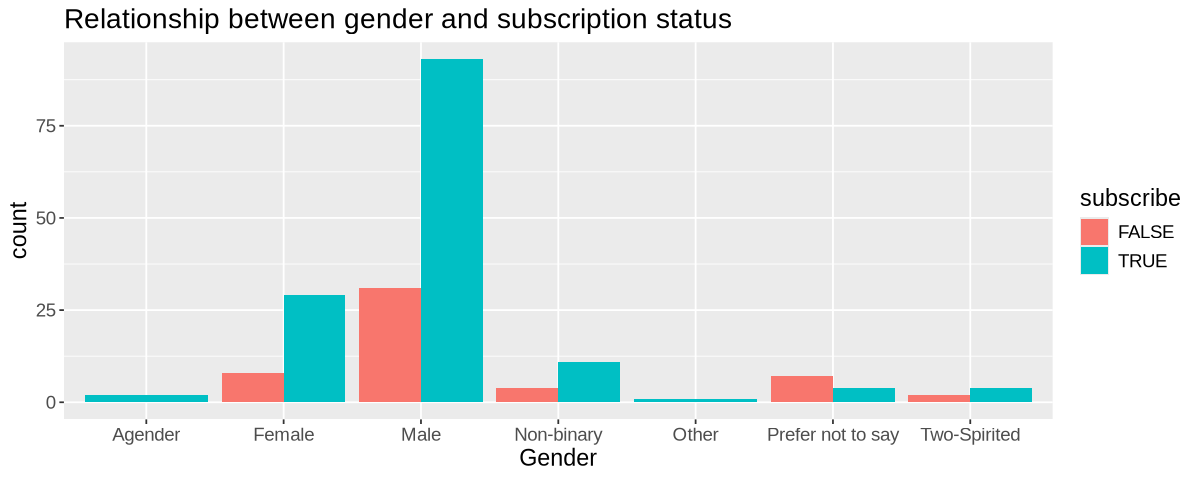

In [19]:
# Scatter graph comparing age and experience
options(repr.plot.width = 10, repr.plot.height = 4)
gender_bar <- players_data_fixed |>
            ggplot(aes(x = gender, fill = subscribe)) +
            geom_bar(position = "dodge") +
            labs(x = "Gender", title = "Relationship between gender and subscription status") + 
            theme(text = element_text(size = 14))       
gender_bar

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


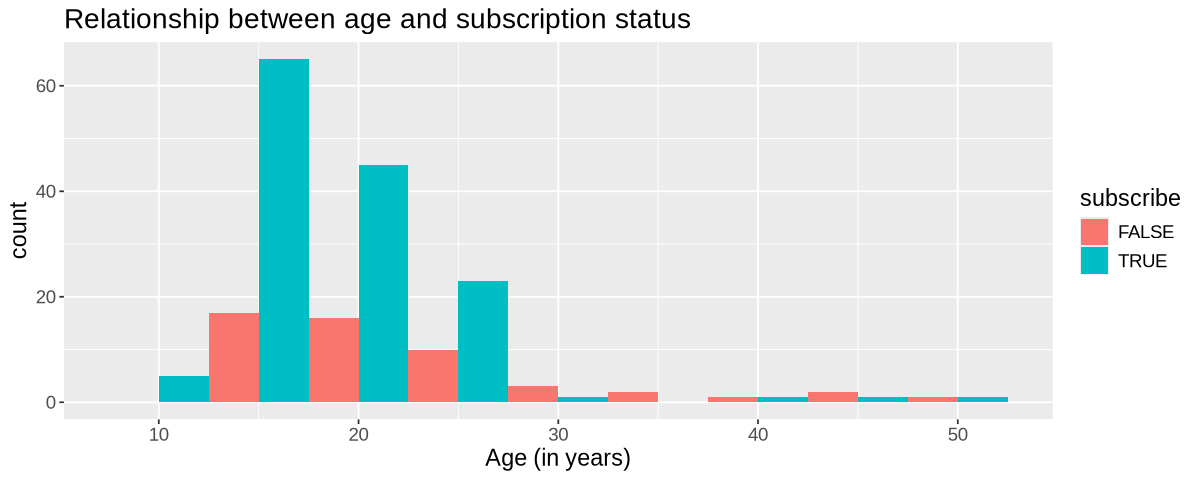

In [23]:
age_histogram <- players_data |>
            ggplot(aes(x = Age, fill = subscribe)) +
            geom_histogram(position = "dodge", binwidth = 5) +
            labs(x = "Age (in years)", title = "Relationship between age and subscription status") + 
            theme(text = element_text(size = 14))       
age_histogram

^ creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis. **idk if this counts**

-**I think this represents the total age which I dont think is what we want**

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


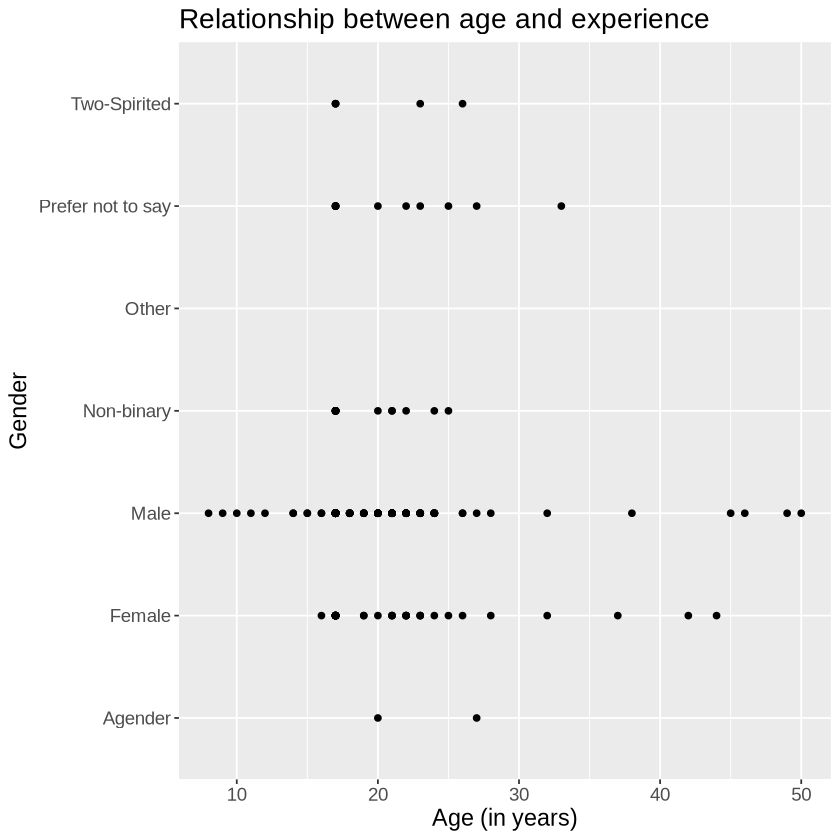

In [6]:
scatter_plot <- players_data |>
            ggplot(aes(x = Age, y = gender)) +
            geom_point() +
            labs(y = "Gender", x = "Age (in years)", title = "Relationship between age and experience") + 
            theme(text = element_text(size = 14))
        

scatter_plot